In [10]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
import pickle

In [11]:
df = pd.read_csv('./data/first-order/Centar', index_col=0)

In [12]:
df.index = pd.to_datetime(df.index)

In [13]:
df.head()

,PM10,PM25,hour_sin,hour_cos,weekday_sin,weekday_cos,month_sin,month_cos,weekend,holiday,...,dew_point,humidity,precip_intensity,precip_probability,temperature,uv_index,visibility,wind_speed,wind_bearing_sin,wind_bearing_cos
Timestamp,,,,,,,,,,,,,,,,,,,,,
2011-09-13 18:00:00,38.154701,57.150101,-1.000000,-1.836970e-16,0.781831,0.62349,0.781831,0.62349,0,0,...,47.50,0.23,0.0,0.0,90.94,0.0,6.206,8.34,0.241922,0.970296
2011-09-13 19:00:00,35.880798,58.806702,-0.965926,2.588190e-01,0.781831,0.62349,0.781831,0.62349,0,0,...,47.52,0.25,0.0,0.0,87.28,0.0,6.206,9.75,0.139173,0.990268
2011-09-13 20:00:00,34.235401,55.489300,-0.866025,5.000000e-01,0.781831,0.62349,0.781831,0.62349,0,0,...,47.58,0.30,0.0,0.0,82.22,0.0,6.206,8.07,0.438371,0.898794
2011-09-13 21:00:00,66.899200,106.093002,-0.707107,7.071068e-01,0.781831,0.62349,0.781831,0.62349,0,0,...,47.41,0.33,0.0,0.0,78.92,0.0,6.206,3.38,-0.342020,0.939693
2011-09-13 22:00:00,79.737198,125.482002,-0.500000,8.660254e-01,0.781831,0.62349,0.781831,0.62349,0,0,...,48.61,0.40,0.0,0.0,74.56,0.0,6.206,3.24,-0.139173,0.990268


Drop the correlated feature

In [14]:
df.drop(['apparent_temperature'], axis = 1, inplace=True)

Add features indicating missing-ness

In [15]:
pollutants = ['PM10', 'PM25']
for p in pollutants:
    df[f'{p}_missing'] = df[f'{p}'].isna().astype('int32')

In [16]:
df.head()

,PM10,PM25,hour_sin,hour_cos,weekday_sin,weekday_cos,month_sin,month_cos,weekend,holiday,...,precip_intensity,precip_probability,temperature,uv_index,visibility,wind_speed,wind_bearing_sin,wind_bearing_cos,PM10_missing,PM25_missing
Timestamp,,,,,,,,,,,,,,,,,,,,,
2011-09-13 18:00:00,38.154701,57.150101,-1.000000,-1.836970e-16,0.781831,0.62349,0.781831,0.62349,0,0,...,0.0,0.0,90.94,0.0,6.206,8.34,0.241922,0.970296,0,0
2011-09-13 19:00:00,35.880798,58.806702,-0.965926,2.588190e-01,0.781831,0.62349,0.781831,0.62349,0,0,...,0.0,0.0,87.28,0.0,6.206,9.75,0.139173,0.990268,0,0
2011-09-13 20:00:00,34.235401,55.489300,-0.866025,5.000000e-01,0.781831,0.62349,0.781831,0.62349,0,0,...,0.0,0.0,82.22,0.0,6.206,8.07,0.438371,0.898794,0,0
2011-09-13 21:00:00,66.899200,106.093002,-0.707107,7.071068e-01,0.781831,0.62349,0.781831,0.62349,0,0,...,0.0,0.0,78.92,0.0,6.206,3.38,-0.342020,0.939693,0,0
2011-09-13 22:00:00,79.737198,125.482002,-0.500000,8.660254e-01,0.781831,0.62349,0.781831,0.62349,0,0,...,0.0,0.0,74.56,0.0,6.206,3.24,-0.139173,0.990268,0,0


### Consecutive hours holes
Let's observe the distribution of consecutive missing target values in our dataset.

In [17]:
df_nans = df[df['PM10'].isna()]
df_nans.head()

,PM10,PM25,hour_sin,hour_cos,weekday_sin,weekday_cos,month_sin,month_cos,weekend,holiday,...,precip_intensity,precip_probability,temperature,uv_index,visibility,wind_speed,wind_bearing_sin,wind_bearing_cos,PM10_missing,PM25_missing
Timestamp,,,,,,,,,,,,,,,,,,,,,
2011-10-18 20:00:00,NaN,NaN,-8.660254e-01,0.500000,0.781831,0.62349,0.974928,-0.222521,0,0,...,0.0,0.0,39.70,0.0,6.206,0.39,-0.945519,-0.325568,1,1
2011-10-30 00:00:00,NaN,NaN,0.000000e+00,1.000000,-0.781831,0.62349,0.974928,-0.222521,1,0,...,0.0,0.0,35.75,0.0,6.206,0.00,NaN,NaN,1,1
2011-10-30 11:00:00,NaN,NaN,2.588190e-01,-0.965926,-0.781831,0.62349,0.974928,-0.222521,1,0,...,0.0,0.0,50.43,3.0,6.216,1.67,0.342020,0.939693,1,1
2011-10-30 12:00:00,NaN,NaN,1.224647e-16,-1.000000,-0.781831,0.62349,0.974928,-0.222521,1,0,...,0.0,0.0,53.66,3.0,6.216,2.24,NaN,NaN,1,1
2011-10-30 13:00:00,NaN,NaN,-2.588190e-01,-0.965926,-0.781831,0.62349,0.974928,-0.222521,1,0,...,0.0,0.0,58.79,2.0,6.206,1.68,0.981627,0.190809,1,1


In [8]:
durations = []
period = timedelta(hours = 1)

for i, dt in enumerate(df_nans.index):
    if i == 0:
        prev_index = dt
        count = 1
    
    true_prev_index = dt - period
    
    if true_prev_index == prev_index:
        count += 1
    
    else:
        durations.append(count)
        count = 1
    
    prev_index = dt 
    
durations.append(count)

durations.sort()
print(len(durations), 'holes')
print('Durations:', durations)

162 holes
Durations: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 14, 14, 15, 15, 15, 15, 16, 17, 17, 18, 18, 18, 19, 19, 19, 21, 22, 22, 22, 22, 22, 23, 23, 24, 25, 26, 27, 28, 28, 28, 30, 31, 35, 36, 39, 41, 43, 45, 47, 48, 49, 50, 53, 54, 57, 58, 60, 61, 70, 71, 74, 76, 80, 87, 120, 147, 164, 167, 171, 211, 227, 267, 491, 526, 677]


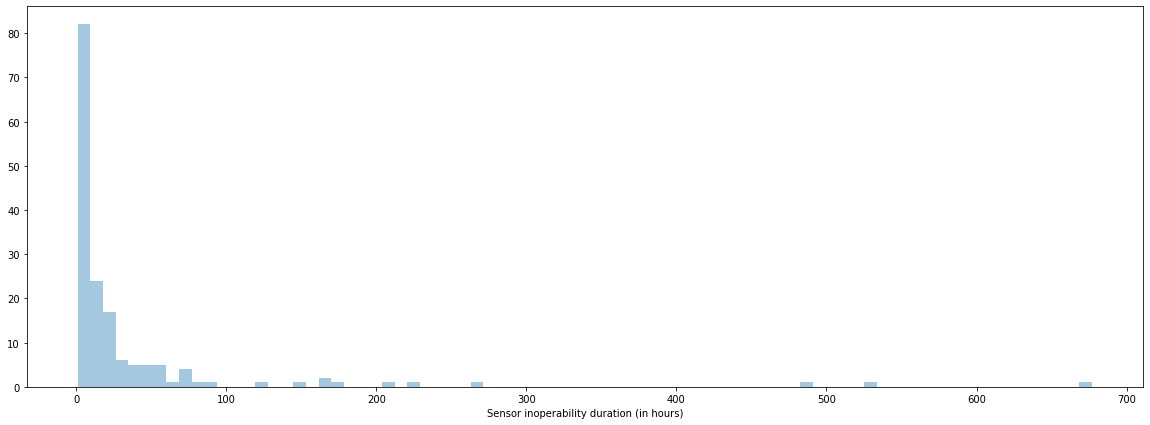

In [9]:
plt.figure(figsize=(20, 7))
ax = sns.distplot(durations, bins=80, kde=False, axlabel = 'Sensor inoperability duration (in hours)')
plt.show()

There are in total 162 periods of inoperability, with a distribution of their duration plotted above. The duration of the sensor inoperability is usually very short, meaning that the imputer will not have such a hard time.

### Inspecting the distribution of each variable

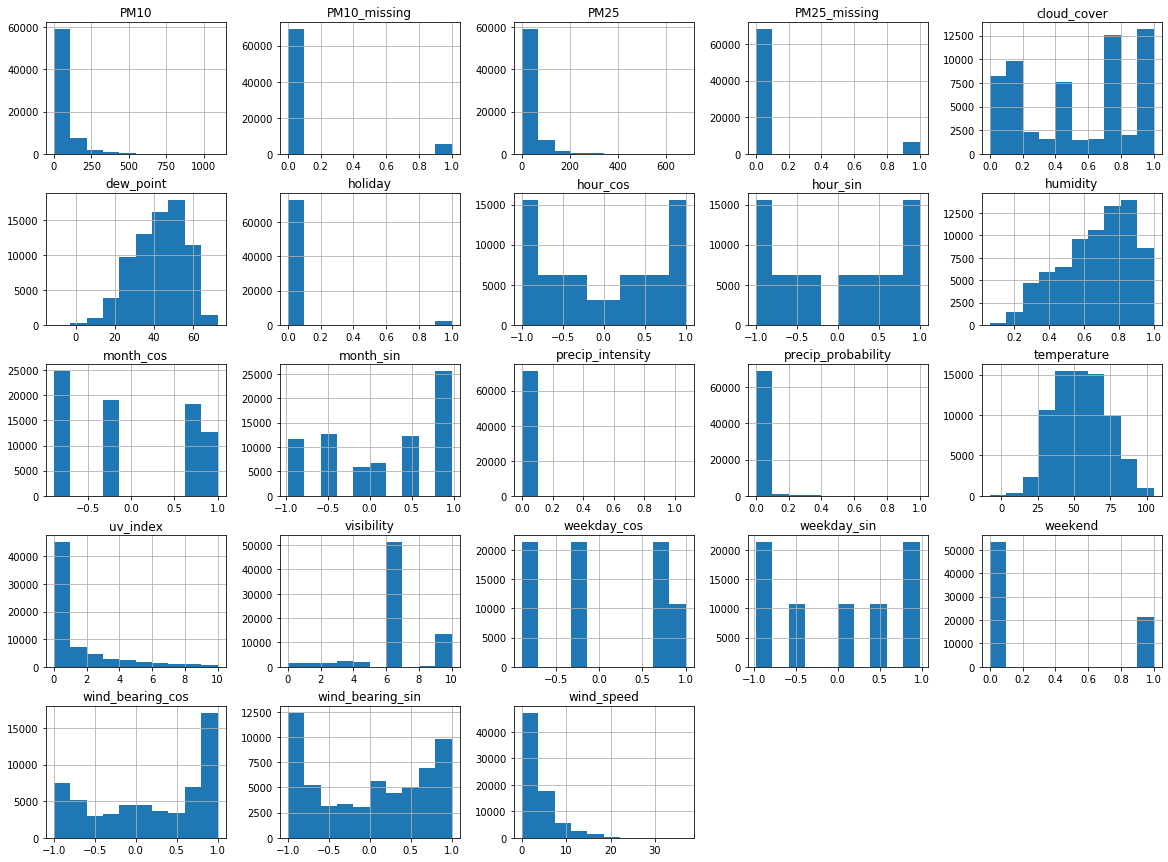

In [8]:
ax = df.hist(figsize=(20, 15))

### Log transform pollutants

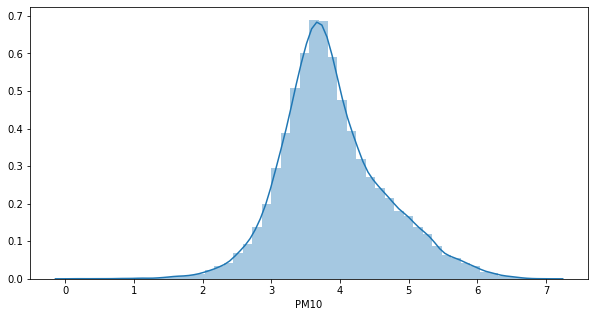

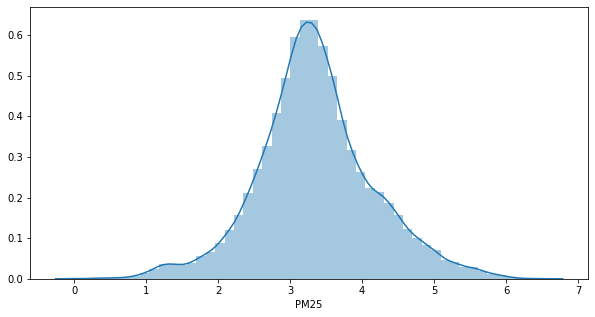

In [18]:
skewed_features = ['PM10', 'PM25']
for f in skewed_features:
    df[f] = np.log(df[f] + 1)
    plt.figure(figsize=(10, 5))
    sns.distplot(df[f])
    plt.show()
    

### Train-val-test split

In [19]:
train_size = int(df.shape[0] * 0.9)
validation_size = int(df.shape[0] * 0.05)

In [20]:
df_train = df.iloc[:train_size]
df_validation = df.iloc[train_size:train_size + validation_size]
df_test = df.iloc[train_size + validation_size:]

### Scaling the data

In [21]:
features_to_normalize = ['cloud_cover', 'hour_sin', 'hour_cos',
                         'month_sin', 'month_cos', 'precip_intensity', 'precip_probability',
                        'uv_index', 'visibility', 'weekday_sin', 'weekday_cos', 'wind_bearing_sin',
                        'wind_bearing_cos', 'wind_speed']
features_to_standardize = ['PM10', 'PM25', 'temperature', 'humidity', 'dew_point']

scalers = {}
for f in features_to_normalize:
    scaler = MinMaxScaler()
    scaler.fit(df_train[f].values.reshape(-1,1))
    scalers[f] = scaler

for f in features_to_standardize:
    scaler = StandardScaler()
    scaler.fit(df_train[f].values.reshape(-1,1))
    scalers[f] = scaler

In [25]:
for feature, scaler in scalers.items():
    with open(f'./pickles/scalers/Centar/{feature}', 'wb') as f:
        pickle.dump(scaler, f)

In [14]:
df_train_scaled = df_train.copy()
df_validation_scaled = df_validation.copy()
df_test_scaled = df_test.copy()

for feature, scaler in scalers.items():
    df_train_scaled[feature] = scaler.transform(df_train[feature].values.reshape(-1,1)).flatten()
    df_validation_scaled[feature] = scaler.transform(df_validation[feature].values.reshape(-1,1)).flatten()
    df_test_scaled[feature] = scaler.transform(df_test[feature].values.reshape(-1,1)).flatten()
        

### Imputing missing values

Estimate which imputer is the best by calculating the Frobinius norm to the real values on the validation set (drop NaN's, produce your own)

In [15]:
train_values = df_train_scaled.values.copy()
valid_values = df_validation_scaled.copy()
test_values = df_test_scaled.copy()

validation_values_true = df_validation_scaled.dropna().values.copy()

In [16]:
# generate the distribution of missingness of the features
missing_train = df_train_scaled.isna().sum().values
missing_train_prob = missing_train / missing_train.sum()
missing_train_prob

array([0.0735979 , 0.07313218, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.20387253, 0.0007762 , 0.00080443, 0.04849135, 0.04849135,
       0.00080443, 0.09551497, 0.00300601, 0.00167942, 0.22491462,
       0.22491462, 0.        , 0.        ])

In [17]:
np.random.seed(0)

# purposefully discard some of the values
validation_values_missing = validation_values_true.copy()
n_samples, n_features = validation_values_missing.shape

missing_samples = np.random.choice(n_samples, int(0.07 * n_samples), replace=False)
for row in missing_samples:
    num_missing_features = np.random.randint(1, 5)
    missing_features = np.random.choice(n_features, num_missing_features, replace=False, p=missing_train_prob)
    validation_values_missing[row, missing_features] = np.nan

In [ ]:
imputers = {'mean': SimpleImputer(missing_values=np.nan, strategy='mean'), 
            'median': SimpleImputer(missing_values=np.nan, strategy='median'),
            'bayesian_ridge': IterativeImputer(estimator=BayesianRidge(), random_state=0),
            'decision_tree': IterativeImputer(estimator=DecisionTreeRegressor(max_features='sqrt', 
                                                                              random_state=0),
                                              random_state=0),
            'k_neighbors_15': IterativeImputer(estimator=KNeighborsRegressor(
                  n_neighbors=15), random_state=0, skip_complete=True),
            'k_neighbors_20': IterativeImputer(estimator=KNeighborsRegressor(
                  n_neighbors=20), random_state=0, skip_complete=True),
            'extra_trees_10': IterativeImputer(estimator=ExtraTreesRegressor(
                  n_estimators=10, random_state=0), random_state=0, skip_complete=True),
            'extra_trees_15': IterativeImputer(estimator=ExtraTreesRegressor(
                  n_estimators=15, random_state=0), random_state=0, skip_complete=True),
            'extra_trees_20': IterativeImputer(estimator=ExtraTreesRegressor(
                  n_estimators=20, random_state=0), random_state=0, skip_complete=True),
            'extra_trees_25': IterativeImputer(estimator=ExtraTreesRegressor(
                  n_estimators=25, random_state=0), random_state=0, skip_complete=True),
            'extra_trees_30': IterativeImputer(estimator=ExtraTreesRegressor(
                  n_estimators=30, random_state=0), random_state=0, skip_complete=True),
              
            }

    
"""
Fit and evaluate each imputer. This was done on Google Colab due to RAM limitations. 
If you want to recreate the results, fit each imputer one by one and restart the runtime
after each run in order to free RAM space, don't do it in a for loop.
"""

# name = 'k_neighbors_15'
# imputer = imputers[name]
# imputer.fit(train_values)
# validation_values_filled = imputer.transform(validation_values_missing)
# norm = np.linalg.norm(validation_values_true - validation_values_filled, ord='fro')
# print(f'{name}:\t\t{norm}')

| Imputer | Score | 
| --- | --- | 
| mean | 8.503 |
| median | 8.636 |
| bayesian_ridge | 7.324 |
| decision_tree | 8.699 |
| k_neighbors_15 | 6.815 |
| k_neighbors_20 | 6.778 |
| extra_trees_10 | 6.331 |
| extra_trees_15 | 5.965 |
| **extra_trees_20** | **5.755** |
| extra_trees_25 | 6.011 |
| extra_trees_30 | 5.913 |


Based on the scores, Extra Trees with 20 estimators are the way to go filling the missing values.

In [ ]:
# Impute values based on best estimator
name = 'extra_trees_20'
imputer = imputers[name]
imputed_train_values = imputer.fit_transform(train_values)
imputed_valid_values = imputer.transform(valid_values)
imputed_test_values = imputer.transform(test_values)

In [ ]:
df_train_imputed = pd.DataFrame(data=imputed_train_values, 
                                index=df_train_scaled.index,
                                columns=df_train_scaled.columns)
df_valid_imputed = pd.DataFrame(data=imputed_valid_values, 
                                index=df_validation_scaled.index,
                                columns=df_validation_scaled.columns)
df_test_imputed = pd.DataFrame(data=imputed_test_values, 
                                index=df_test_scaled.index,
                                columns=df_test_scaled.columns)

In [ ]:
df_train_imputed.to_csv(f'./data/second-order/Centar/train', index=True)
df_valid_imputed.to_csv(f'./data/second-order/Centar/validation', index=True)
df_test_imputed.to_csv(f'./data/second-order/Centar/test', index=True)

In [4]:
df_train = pd.read_csv(f'./data/second-order/Centar/train', index_col=0)
df_validation = pd.read_csv(f'./data/second-order/Centar/validation', index_col=0)
df_test = pd.read_csv(f'./data/second-order/Centar/test', index_col=0)

In [7]:
print(df_train.shape)
print(df_train.isna().sum())
df_train.head()

(67432, 23)
PM10                  0
PM25                  0
hour_sin              0
hour_cos              0
weekday_sin           0
weekday_cos           0
month_sin             0
month_cos             0
weekend               0
holiday               0
cloud_cover           0
dew_point             0
humidity              0
precip_intensity      0
precip_probability    0
temperature           0
uv_index              0
visibility            0
wind_speed            0
wind_bearing_sin      0
wind_bearing_cos      0
PM10_missing          0
PM25_missing          0
dtype: int64


,PM10,PM25,hour_sin,hour_cos,weekday_sin,weekday_cos,month_sin,month_cos,weekend,holiday,...,precip_intensity,precip_probability,temperature,uv_index,visibility,wind_speed,wind_bearing_sin,wind_bearing_cos,PM10_missing,PM25_missing
Timestamp,,,,,,,,,,,,,,,,,,,,,
2011-09-13 18:00:00,-0.330611,0.856226,0.000000,0.500000,0.900969,0.801938,0.900969,0.801938,0.0,0.0,...,0.0,0.0,2.009019,0.0,0.6206,0.225955,0.620961,0.985148,0.0,0.0
2011-09-13 19:00:00,-0.408947,0.890166,0.017037,0.629410,0.900969,0.801938,0.900969,0.801938,0.0,0.0,...,0.0,0.0,1.804491,0.0,0.6206,0.264156,0.569587,0.995134,0.0,0.0
2011-09-13 20:00:00,-0.468705,0.821216,0.066987,0.750000,0.900969,0.801938,0.900969,0.801938,0.0,0.0,...,0.0,0.0,1.521727,0.0,0.6206,0.218640,0.719186,0.949397,0.0,0.0
2011-09-13 21:00:00,0.390181,1.594060,0.146447,0.853553,0.900969,0.801938,0.900969,0.801938,0.0,0.0,...,0.0,0.0,1.337316,0.0,0.6206,0.091574,0.328990,0.969846,0.0,0.0
2011-09-13 22:00:00,0.616925,1.795114,0.250000,0.933013,0.900969,0.801938,0.900969,0.801938,0.0,0.0,...,0.0,0.0,1.093670,0.0,0.6206,0.087781,0.430413,0.995134,0.0,0.0


In [8]:
print(df_validation.shape)
print(df_validation.isna().sum())
df_validation.head()

(3746, 23)
PM10                  0
PM25                  0
hour_sin              0
hour_cos              0
weekday_sin           0
weekday_cos           0
month_sin             0
month_cos             0
weekend               0
holiday               0
cloud_cover           0
dew_point             0
humidity              0
precip_intensity      0
precip_probability    0
temperature           0
uv_index              0
visibility            0
wind_speed            0
wind_bearing_sin      0
wind_bearing_cos      0
PM10_missing          0
PM25_missing          0
dtype: int64


,PM10,PM25,hour_sin,hour_cos,weekday_sin,weekday_cos,month_sin,month_cos,weekend,holiday,...,precip_intensity,precip_probability,temperature,uv_index,visibility,wind_speed,wind_bearing_sin,wind_bearing_cos,PM10_missing,PM25_missing
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-05-24 18:00:00,-1.427965,-0.205203,0.000000,0.500000,0.277479,0.0,0.277479,4.996004e-16,0.0,1.0,...,0.013585,0.09,0.715348,0.111111,1.0,0.105391,0.404596,0.990814,0.0,0.0
2019-05-24 19:00:00,-1.122834,-0.027165,0.017037,0.629410,0.277479,0.0,0.277479,4.996004e-16,0.0,1.0,...,0.027761,0.09,0.623702,0.000000,1.0,0.085885,0.370590,0.982963,0.0,0.0
2019-05-24 20:00:00,-1.236930,-0.232264,0.066987,0.750000,0.277479,0.0,0.277479,4.996004e-16,0.0,1.0,...,0.009746,0.04,0.481202,0.000000,1.0,0.065565,0.185340,0.888573,0.0,0.0
2019-05-24 21:00:00,-1.148399,-0.312190,0.146447,0.853553,0.277479,0.0,0.277479,4.996004e-16,0.0,1.0,...,0.006202,0.03,0.364967,0.000000,1.0,0.060959,0.185340,0.888573,0.0,0.0
2019-05-24 22:00:00,-1.173760,-0.397705,0.250000,0.933013,0.277479,0.0,0.277479,4.996004e-16,0.0,1.0,...,0.005316,0.03,0.274997,0.000000,1.0,0.055811,0.257595,0.937310,0.0,0.0


In [9]:
print(df_test.shape)
print(df_test.isna().sum())
df_test.head()

(3747, 23)
PM10                  0
PM25                  0
hour_sin              0
hour_cos              0
weekday_sin           0
weekday_cos           0
month_sin             0
month_cos             0
weekend               0
holiday               0
cloud_cover           0
dew_point             0
humidity              0
precip_intensity      0
precip_probability    0
temperature           0
uv_index              0
visibility            0
wind_speed            0
wind_bearing_sin      0
wind_bearing_cos      0
PM10_missing          0
PM25_missing          0
dtype: int64


,PM10,PM25,hour_sin,hour_cos,weekday_sin,weekday_cos,month_sin,month_cos,weekend,holiday,...,precip_intensity,precip_probability,temperature,uv_index,visibility,wind_speed,wind_bearing_sin,wind_bearing_cos,PM10_missing,PM25_missing
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-10-27 20:00:00,0.827117,0.761137,0.066987,0.750000,0.099031,0.801938,1.0,0.356896,1.0,0.0,...,0.0,0.0,0.132498,0.0,1.0,0.090219,0.090424,0.213212,0.0,0.0
2019-10-27 21:00:00,0.934921,0.866843,0.146447,0.853553,0.099031,0.801938,1.0,0.356896,1.0,0.0,...,0.0,0.0,0.050910,0.0,1.0,0.081550,0.192169,0.894005,0.0,0.0
2019-10-27 22:00:00,0.996966,0.942819,0.250000,0.933013,0.099031,0.801938,1.0,0.356896,1.0,0.0,...,0.0,0.0,-0.032354,0.0,1.0,0.071796,0.027241,0.662784,0.0,0.0
2019-10-27 23:00:00,1.330529,1.165156,0.370590,0.982963,0.099031,0.801938,1.0,0.356896,1.0,0.0,...,0.0,0.0,-0.125678,0.0,1.0,0.061772,0.014852,0.620961,0.0,0.0
2019-10-28 01:00:00,0.941253,0.896652,0.629410,0.982963,0.500000,1.000000,1.0,0.356896,0.0,0.0,...,0.0,0.0,-0.238559,0.0,1.0,0.059063,0.017037,0.629410,0.0,0.0
